In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# The Game of Frogger

## The game of Frogger is a simple game where a frog starts at one side of a stream and tries to get to the other side of the stream. The stream has within it N lily pads. The frog starts, effectively, on pad 0 and can jump to pad 1, 2, 3, ..., N+1. The frog is equally likely to jump to any of the pads 1, 2, 3, ..., N+1.  The frog gets to the other side when she reaches pad N+1.

## The question is, on average, how many jumps does it take for the frog to get to the other side of the stream?


## Analytic Solution

### The expectation value for a discrete random variable is defined as:

### $E = \sum_{i=0}^{n} x_i p_i$

### where $x_i$ is the value of the random variable and $p_i$ is the probability of the random variable taking on the value $x_i$.

### Let's consider some simple cases:

### n = 0

### $E_0 = x_0 p_0 = 1 \cdot 1 = 1$

### n = 1

### $E_1 = \frac{1}{2} (1) + \frac{1}{2} (2) = 1 + \frac{1}{2} (1) = \frac{3}{2}$ = 1.5

### n = 2

### $E_2 = \frac{1}{3} (1) + \frac{1}{3} (\frac{1}{2} (2) + \frac{1}{2} (3)) + \frac{1}{3} (2)  = 1 + \frac{1}{3} (\frac{3}{2}) + \frac{1}{3} (1) = \frac{11}{6} = 1.8333$

### We can observe a pattern now ... for each value of $n$, we can break down the problem into a sum of the previous problems (for smaller n values).  We see that for any value of n, the expectation value is:

### $E_n = 1 + \frac{1}{n+1} \sum_{i=1}^{n} E_{n-i}$

### So, we can calculate the expectation value for any value of n by calculating the expectation value for all smaller values of n.  A recursive solution to this problem seems appropriate.

## Harmonic Mean

### The harmonic mean is defined as:

### $H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$

### where $x_i$ is the value of the random variable and $n$ is the number of values of $x_i$.

### The harmonic mean is the appropriate mean to use when the values of the random variable are rates (e.g. miles per gallon).  In this case, the values of the random variable are the number of jumps it takes for the frog to get to the other side of the stream.  So, the harmonic mean is the appropriate mean to use.



### Set the number of lilypads

In [2]:
n = 100

### seed the random number generator

In [3]:
random.seed(1)

In [4]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 1000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [5]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])
  

In [6]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            """
            # This is the code we want to modify, instead we want it to jump to any other lilly pad
            jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            """

            jump = current_paddle
            while jump == current_paddle:
                jump = int(random.uniform(0,(end+1)))

            current_paddle = jump
            
            # jump ahead
            #current_paddle = current_paddle + jump
            current_paddle = jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.990000
Expectation value for n = 2 is 3.032000
Expectation value for n = 3 is 3.978000
Expectation value for n = 4 is 5.050000
Expectation value for n = 5 is 5.929000
Expectation value for n = 6 is 6.651000
Expectation value for n = 7 is 7.835000
Expectation value for n = 8 is 8.627000
Expectation value for n = 9 is 9.605000
Expectation value for n = 10 is 11.016000
Expectation value for n = 11 is 12.319000
Expectation value for n = 12 is 12.458000
Expectation value for n = 13 is 14.389000
Expectation value for n = 14 is 15.190000
Expectation value for n = 15 is 15.536000
Expectation value for n = 16 is 17.192000
Expectation value for n = 17 is 17.984000
Expectation value for n = 18 is 20.012000
Expectation value for n = 19 is 19.903000
Expectation value for n = 20 is 21.217000
Expectation value for n = 21 is 22.663000
Expectation value for n = 22 is 22.878000
Expectation value for n = 23 is 23.516000
Expectation 

<ErrorbarContainer object of 3 artists>

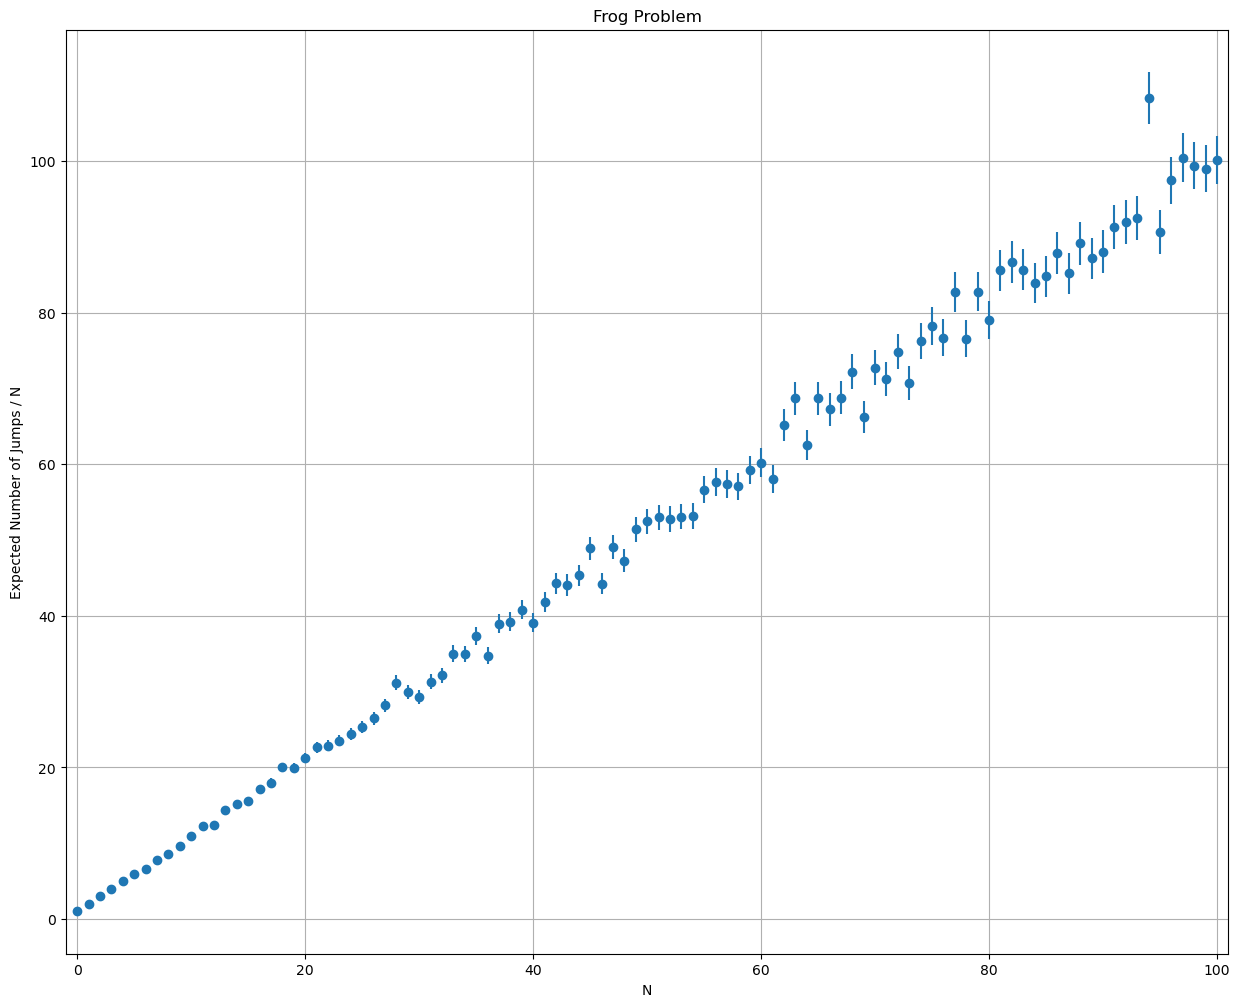

In [7]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,eval,'r--')
#ax1.plot(x,eval_harmonic,'g--')


We can see here, in the case where the frog can jump to any other lilly pad, even backwards, A linear relationship is generally followed, where the number of jumps is equal to the number of lilly pads. This is because the frog is equally likely to jump to any other lilly pad, so the number of jumps is equal to the number of lilly pads. This makes sense, as for example when theres 100 possible places to jump to, but only 1 is the end, you have a 1% chance of sucess, even when youre for example at pad 47, and theres only 99 possible lilly pads to jump too, the starting point is still a possible option, so the number of possible places to jumpt too is still 100. 

Now let's do the same thing, but where the frog can only jumpt forward, and the probability of it landing in a particular lilly pad is inverse to the distance of the lilly pad from the jump point.

In [8]:
n = 100

In [9]:
random.seed(1)

In [10]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])
  

In [11]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            """
            # This is the code we want to modify, instead we want it to jump to any other lilly pad
            jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            """

            possible_jumps = 1/np.arange(1,end+1)
            jump_probabilities = possible_jumps/np.sum(possible_jumps)
            jump = np.random.choice(possible_jumps, p=jump_probabilities)
            
            # jump ahead
            #current_paddle = current_paddle + jump
            current_paddle = jump + current_paddle
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 2.596000
Expectation value for n = 2 is 4.483000
Expectation value for n = 3 is 6.320000
Expectation value for n = 4 is 8.382000
Expectation value for n = 5 is 10.501000
Expectation value for n = 6 is 12.691000
Expectation value for n = 7 is 14.839000
Expectation value for n = 8 is 17.328000
Expectation value for n = 9 is 19.566000
Expectation value for n = 10 is 22.163000
Expectation value for n = 11 is 24.471000
Expectation value for n = 12 is 27.089000
Expectation value for n = 13 is 29.698000
Expectation value for n = 14 is 32.205000
Expectation value for n = 15 is 34.819000
Expectation value for n = 16 is 37.762000
Expectation value for n = 17 is 40.306000
Expectation value for n = 18 is 43.342000
Expectation value for n = 19 is 45.617000
Expectation value for n = 20 is 48.758000
Expectation value for n = 21 is 51.270000
Expectation value for n = 22 is 54.226000
Expectation value for n = 23 is 56.912000
Expecta

<ErrorbarContainer object of 3 artists>

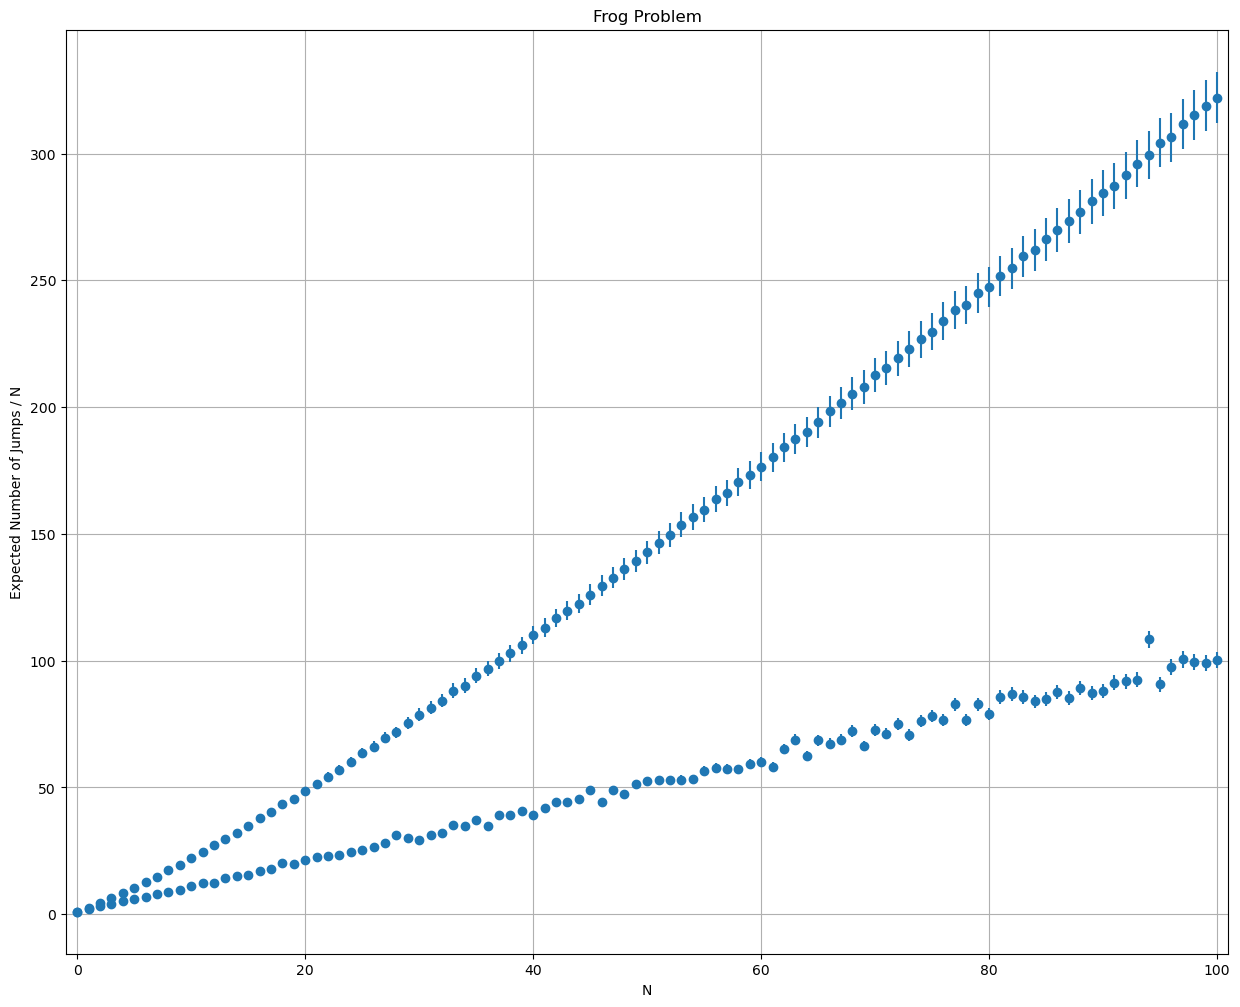

In [12]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,eval,'r--')
#ax1.plot(x,eval_harmonic,'g--')

The expected number of jumps increases roughly linearly with the number of lilly pads once th number of lilly pads is high enough, and that would seem to make logical sense. As the number of lilly pads increases, every time the frog makes a jump, its still most likley to land in one of the first couple lilly pads, as jumping to say the 50th pad is such an incredibly small chance in comparison. At a small number of lilly pads that chance of simply jumping to the end isnt quite as small, so we can see a steeper slope there. It seems to me somewhat similar to something like air resistence. The rate at which the increasing the number of lilly pads increases how many jumps are needed at a certain point becomes linear instead of exponential, in the same way a falling object eventually reaches terminal velocity. It would seem to make sense that a differential equation could be used to get the theory predicition for number of jumps needed, simply following similar math to drag forces.